### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [11]:
%matplotlib inline

In [12]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read the mouse data and the study results

mouse_metadata = pd.read_csv('../Resources/Mouse_metadata.csv')
study_results = pd.read_csv('../Resources/Study_results.csv')

In [14]:
# Display the mouse data
mouse_metadata.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
# Display the study data
study_results.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [27]:
# Combine the data into a single dataset and display it
study_data_combined = pd.merge(study, mouse, how="left", on="Mouse ID")
study_data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = study_data_combined.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = study_data_combined.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_study_data_combined = study_data_combined[study_data_combined['Mouse ID'].isin(duplicate)==False]
clean_study_data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


### Generating the Boxplot

In [33]:
# Determine the final timepoint for each mouse.
# Start by getting the greatest timepoint for each mouse
greatest_timepoint= clean_study_data_combined.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [35]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
merged_dfs = greatest_timepoint.merge(clean_study_data_combined, on=['Mouse ID', 'Timepoint'], how='left')
merged_dfs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [42]:
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

# Create a empty list to fill with the tumor vol data
tumor_vol = []

# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in treatment_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tumor_vol = merged_dfs.loc[merged_dfs['Drug Regimen'] == drug]['Tumor Volume (mm3)']
        
    # Append the outcome to the empty list previously created.
    tumor_vol.append(final_tumor_vol)
    
tumor_vol

[0      67.973419
 1      65.525743
 11     57.031862
 13     66.083066
 27     72.226731
 31     36.321346
 41     60.969711
 50     62.435404
 56     60.918767
 79     67.289621
 98     66.196912
 102    62.117279
 124    47.010364
 130    60.165180
 142    55.629428
 143    45.699331
 154    54.656549
 171    55.650681
 198    46.250112
 201    54.048608
 203    51.542431
 212    50.005138
 217    58.268442
 234    67.685569
 246    62.754451
 Name: Tumor Volume (mm3), dtype: float64,
 2      70.717621
 17     72.255963
 29     65.815165
 36     69.042841
 38     69.823146
 48     73.212939
 80     47.520632
 83     53.303185
 87     52.942902
 115    45.000000
 132    58.011146
 136    62.030594
 141    73.059454
 157    53.713158
 161    66.096475
 168    50.218605
 173    64.119142
 174    49.000125
 186    63.423695
 188    56.527952
 199    50.649038
 206    52.614689
 211    68.134288
 231    58.634971
 237    66.842635
 Name: Tumor Volume (mm3), dtype: float64,
 3      62.999

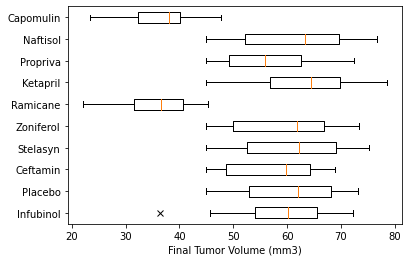

In [48]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization
cross = dict(markerfacecolor='r', marker='x')

# Create horizontal box and whisker plot
plt.boxplot(tumor_vol, labels = treatment_list, flierprops=cross, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.show()